##Question4:

Reference:  https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html I have used this to know the parameters used in KernalPCA function 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error

In [ ]:
df1 = pd.read_csv('https://www.ee.iitb.ac.in/~asethi/Dump/DataKPCA.csv') # Reading the data file
df1.head()

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540


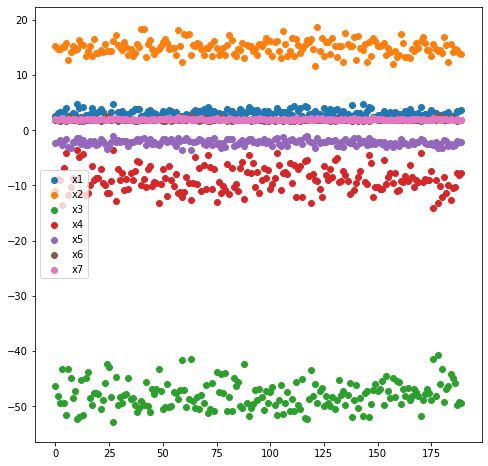

In [ ]:
'''
(a) Visualization of data 
'''
x = np.arange(0,df1.shape[0],1)
plt.figure(figsize=(8, 8))
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 16
fig_size[1] = 6
for i in range(df1.shape[1]):
  p = str(i+1)
  plt.scatter(x,df1.iloc[:,i],label= 'x'+p)  # Data is visualized using scatter plot
  plt.legend()


In [ ]:
'''
(b) KPCA training
'''
kpca = KernelPCA(n_components = 10,kernel = 'rbf', gamma = 15) # Here kernal is rbf and dimension is 10
df1_kpca = kpca.fit_transform(df1)

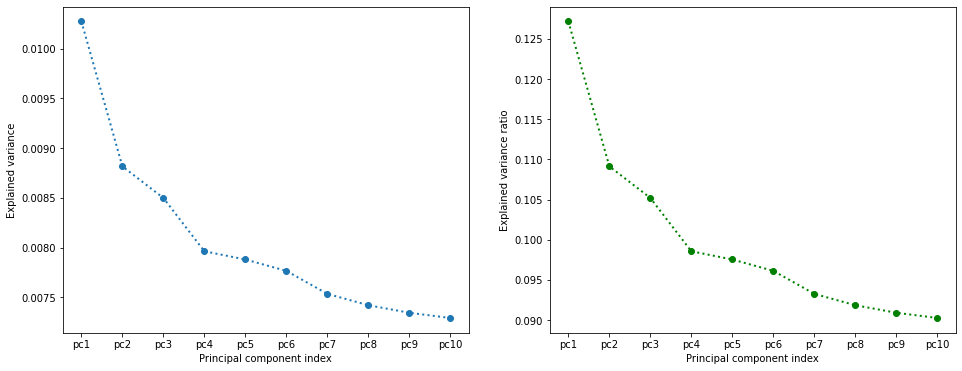

In [ ]:
'''
(c) Plot of the variance explained versus KPCA dimensions for up to 10 dimensions
'''
df1_expl_var_kpca = np.var(df1_kpca, axis=0) # To find variance of each row
df1_expl_var_ratio_kpca = df1_expl_var_kpca /(np.sum(df1_expl_var_kpca ))
label = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10']
plt.subplot(121)
plt.plot(range(0,len(df1_expl_var_kpca)), df1_expl_var_kpca, marker = "o",linestyle='dotted',  linewidth=2) # plot of the variance explained versus PCA dimensions
plt.xticks(range(0,len(df1_expl_var_kpca)), label, rotation ='horizontal')
plt.ylabel('Explained variance')
plt.xlabel('Principal component index')
plt.subplot(122)
plt.plot(range(0,len(df1_expl_var_ratio_kpca)), df1_expl_var_ratio_kpca, color = 'green', marker = "o",linestyle='dotted',  linewidth=2) # plot of the variance explained ratio versus PCA dimensions
plt.xticks(range(0,len(df1_expl_var_ratio_kpca)), label, rotation ='horizontal')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.show()